In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
import math

In [36]:
#Concatenamos varis dataframe em um só #
def get(tickers, startdata, enddate):
    def data(ticker):
        return pdr.get_data_yahoo(ticker, start=startdata, end=enddate)
    datas = map (data,tickers) 
    return (pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

In [37]:
#['ENGI11', 'CPFE3', 'EQTL3', 'NEOE3', 'EGIE3', 'CESP6', 'ALUP11', 'LIGT3', 'TIET11','CPLE6', 'TRPL4']#

tickers = ['ENGI11.SA', 'CPFE3.SA', 'EQTL3.SA', 'NEOE3.SA', 'EGIE3.SA', 'CESP6.SA', 'ALUP11.SA', 'LIGT3.SA', 'CPLE6.SA', 'TRPL4.SA']
all_data = get(tickers, datetime.datetime(2010,10,1), datetime.datetime(2021,1,1))

In [38]:
all_data

High        Low       Open      Close     Volume  \
Ticker    Date                                                                
ENGI11.SA 2010-10-01   9.135193   9.090192   9.090192   9.135193     9999.0   
          2010-10-04   9.153194   9.090192   9.135193   9.108193    28888.0   
          2010-10-05   9.270196   9.180194   9.180194   9.270196    14666.0   
          2010-10-06   9.315197   9.315197   9.315197   9.315197     5555.0   
          2010-10-07   9.405199   9.225195   9.315197   9.270196    39999.0   
...                         ...        ...        ...        ...        ...   
TRPL4.SA  2020-12-22  27.730000  27.340000  27.639999  27.540001   918300.0   
          2020-12-23  27.860001  27.469999  27.620001  27.799999   752700.0   
          2020-12-28  28.360001  27.780001  27.969999  27.990000  1196200.0   
          2020-12-29  28.370001  27.950001  28.120001  28.370001   675500.0   
          2020-12-30  28.360001  27.809999  28.360001  27.809999  2488000.0   

                      Adj Close  
Ticker    Date                   
ENGI11.SA 2010-10-01   6.078484  
          2010-10-04   6.060520  
          2010-10-05   6.168314  
          2010-10-06   6.198258  
          2010-10-07   6.168314  
...                         ...  
TRPL4.SA  2020-12-22  25.361433  
          2020-12-23  25.600864  
          2020-12-28  25.775837  
          2020-12-29  26.125774  
          2020-12-30  25.610073  

[22593 rows x 6 columns]

In [39]:
daily_close_all = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')
daily_close_all

Ticker,ALUP11.SA,CESP6.SA,CPFE3.SA,CPLE6.SA,EGIE3.SA,ENGI11.SA,EQTL3.SA,LIGT3.SA,NEOE3.SA,TRPL4.SA
Date,,,,,,,,,,
2010-10-01,NaN,14.820407,11.454602,1.843350,9.884186,6.078484,1.746909,14.425320,NaN,6.518198
2010-10-04,NaN,15.174089,11.649731,1.924813,10.149084,6.060520,1.710958,14.264669,NaN,6.729263
2010-10-05,NaN,15.795885,11.795356,1.994354,9.963263,6.168314,1.748543,14.599360,NaN,6.729263
2010-10-06,NaN,15.858635,11.795356,1.986904,10.160948,6.198258,1.764885,14.693077,NaN,6.586485
2010-10-07,NaN,15.687502,11.687595,1.976970,10.042335,6.168314,1.787762,14.826954,NaN,6.617525
...,...,...,...,...,...,...,...,...,...,...
2020-12-22,25.391376,26.077522,28.846321,5.825683,40.279400,47.439434,21.998722,21.745014,16.624626,25.361433
2020-12-23,25.575373,26.558044,28.666368,6.001266,40.651844,47.391361,22.018147,22.883497,16.830351,25.600864
2020-12-28,25.720633,26.964640,28.981283,6.141412,41.750542,48.247078,22.377508,23.158630,17.085062,25.775837


In [40]:
daily_close_all.fillna(0, inplace=True)

In [41]:
daily_close_all

Ticker,ALUP11.SA,CESP6.SA,CPFE3.SA,CPLE6.SA,EGIE3.SA,ENGI11.SA,EQTL3.SA,LIGT3.SA,NEOE3.SA,TRPL4.SA
Date,,,,,,,,,,
2010-10-01,0.000000,14.820407,11.454602,1.843350,9.884186,6.078484,1.746909,14.425320,0.000000,6.518198
2010-10-04,0.000000,15.174089,11.649731,1.924813,10.149084,6.060520,1.710958,14.264669,0.000000,6.729263
2010-10-05,0.000000,15.795885,11.795356,1.994354,9.963263,6.168314,1.748543,14.599360,0.000000,6.729263
2010-10-06,0.000000,15.858635,11.795356,1.986904,10.160948,6.198258,1.764885,14.693077,0.000000,6.586485
2010-10-07,0.000000,15.687502,11.687595,1.976970,10.042335,6.168314,1.787762,14.826954,0.000000,6.617525
...,...,...,...,...,...,...,...,...,...,...
2020-12-22,25.391376,26.077522,28.846321,5.825683,40.279400,47.439434,21.998722,21.745014,16.624626,25.361433
2020-12-23,25.575373,26.558044,28.666368,6.001266,40.651844,47.391361,22.018147,22.883497,16.830351,25.600864
2020-12-28,25.720633,26.964640,28.981283,6.141412,41.750542,48.247078,22.377508,23.158630,17.085062,25.775837


In [42]:
#Calculando o retorno diario dos seus crecimentos #
daily_log_return = np.log(daily_close_all.pct_change() + 1)
daily_log_return.fillna(0,inplace=True)
daily_log_return

Ticker,ALUP11.SA,CESP6.SA,CPFE3.SA,CPLE6.SA,EGIE3.SA,ENGI11.SA,EQTL3.SA,LIGT3.SA,NEOE3.SA,TRPL4.SA
Date,,,,,,,,,,
2010-10-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-10-04,0.000000,0.023584,0.016891,0.043244,0.026447,-0.002960,-0.020795,-0.011199,0.000000,0.031868
2010-10-05,0.000000,0.040160,0.012423,0.035492,-0.018479,0.017630,0.021729,0.023192,0.000000,0.000000
2010-10-06,0.000000,0.003965,0.000000,-0.003743,0.019647,0.004843,0.009303,0.006399,0.000000,-0.021446
2010-10-07,0.000000,-0.010850,-0.009178,-0.005012,-0.011742,-0.004843,0.012879,0.009070,0.000000,0.004702
...,...,...,...,...,...,...,...,...,...,...
2020-12-22,-0.010622,-0.015245,0.012555,0.010423,-0.005533,-0.003036,0.020518,-0.012142,0.001769,0.002909
2020-12-23,0.007220,0.018259,-0.006258,0.029694,0.009204,-0.001014,0.000883,0.051032,0.012299,0.009396
2020-12-28,0.005664,0.015194,0.010926,0.023084,0.026668,0.017895,0.016189,0.011952,0.015021,0.006811


In [43]:
#   Tamos calculando em cima do Adj Close  #
#   Variação percentual diaria  #

daily_pct_chance_all = (daily_close_all / daily_close_all.shift(1) - 1)
daily_pct_chance_all.fillna(0,inplace=True)
daily_pct_chance_all

Ticker,ALUP11.SA,CESP6.SA,CPFE3.SA,CPLE6.SA,EGIE3.SA,ENGI11.SA,EQTL3.SA,LIGT3.SA,NEOE3.SA,TRPL4.SA
Date,,,,,,,,,,
2010-10-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-10-04,0.000000,0.023865,0.017035,0.044193,0.026800,-0.002955,-0.020580,-0.011137,0.000000,0.032381
2010-10-05,0.000000,0.040977,0.012500,0.036129,-0.018309,0.017786,0.021967,0.023463,0.000000,0.000000
2010-10-06,0.000000,0.003973,0.000000,-0.003736,0.019841,0.004855,0.009346,0.006419,0.000000,-0.021217
2010-10-07,0.000000,-0.010791,-0.009136,-0.005000,-0.011673,-0.004831,0.012963,0.009112,0.000000,0.004713
...,...,...,...,...,...,...,...,...,...,...
2020-12-22,-0.010566,-0.015130,0.012634,0.010478,-0.005517,-0.003031,0.020730,-0.012069,0.001771,0.002913
2020-12-23,0.007246,0.018427,-0.006238,0.030140,0.009247,-0.001013,0.000883,0.052356,0.012375,0.009441
2020-12-28,0.005680,0.015310,0.010986,0.023353,0.027027,0.018056,0.016321,0.012023,0.015134,0.006835


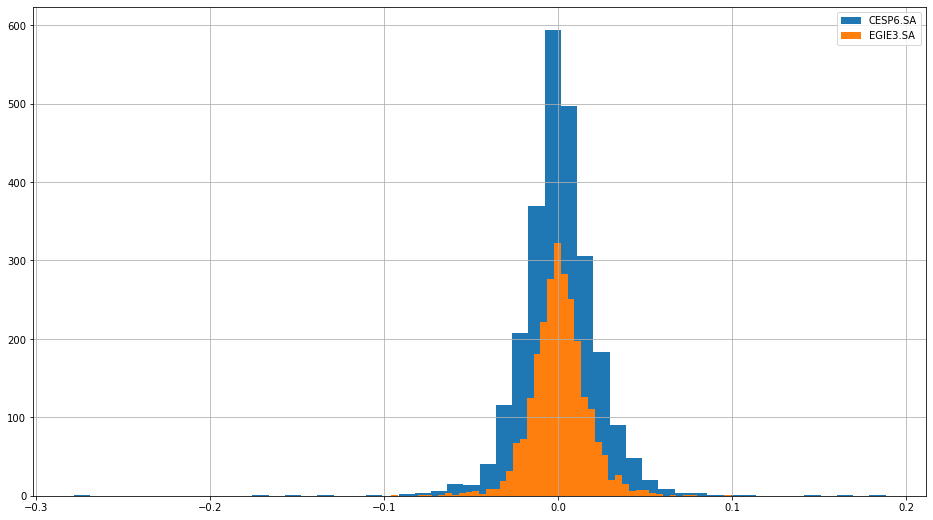

In [44]:
plt.figure(figsize=(16,9))
daily_pct_chance_all['CESP6.SA'].hist(bins=50, legend='CESP6.SA')
daily_pct_chance_all['EGIE3.SA'].hist(bins=50, legend='EGIE3.SA')
plt.show()

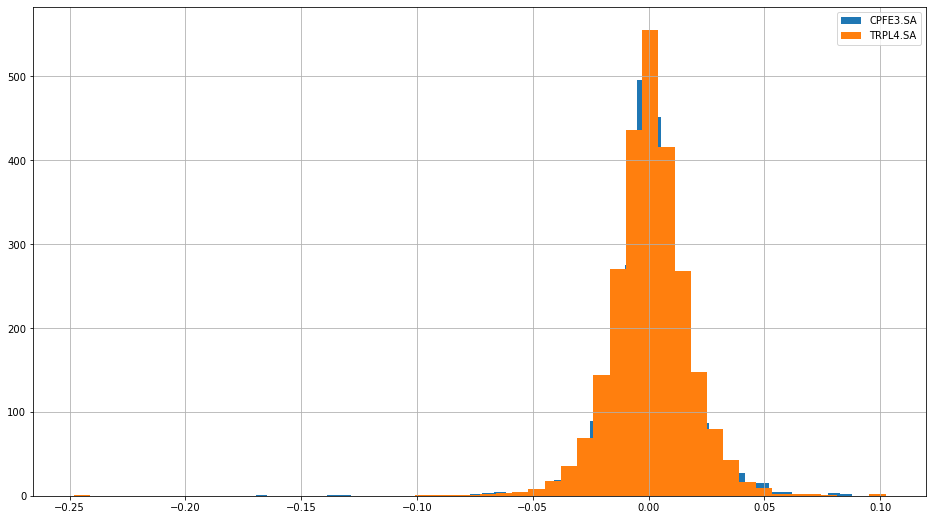

In [45]:
plt.figure(figsize=(16,9))
daily_pct_chance_all['CPFE3.SA'].hist(bins=50,legend='CPFE3.SA')
daily_pct_chance_all['TRPL4.SA'].hist(bins=50, legend='TRPL4.SA')
plt.show()

In [46]:
cum_daily_return = (1 + daily_pct_chance_all).cumprod()
cum_daily_return

Ticker,ALUP11.SA,CESP6.SA,CPFE3.SA,CPLE6.SA,EGIE3.SA,ENGI11.SA,EQTL3.SA,LIGT3.SA,NEOE3.SA,TRPL4.SA
Date,,,,,,,,,,
2010-10-01,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
2010-10-04,1.0,1.023865,1.017035,1.044193,1.026800,0.997045,0.979420,0.988863,1.0,1.032381
2010-10-05,1.0,1.065820,1.029748,1.081919,1.008000,1.014778,1.000935,1.012065,1.0,1.032381
2010-10-06,1.0,1.070054,1.029748,1.077877,1.028000,1.019705,1.010290,1.018562,1.0,1.010476
2010-10-07,1.0,1.058507,1.020341,1.072487,1.016000,1.014778,1.023386,1.027842,1.0,1.015238
...,...,...,...,...,...,...,...,...,...,...
2020-12-22,inf,1.759569,2.518317,3.160378,4.075136,7.804485,12.592943,1.507420,inf,3.890866
2020-12-23,inf,1.791992,2.502607,3.255631,4.112817,7.796576,12.604063,1.586342,inf,3.927598
2020-12-28,inf,1.819426,2.530099,3.331658,4.223974,7.937354,12.809776,1.605415,inf,3.954442


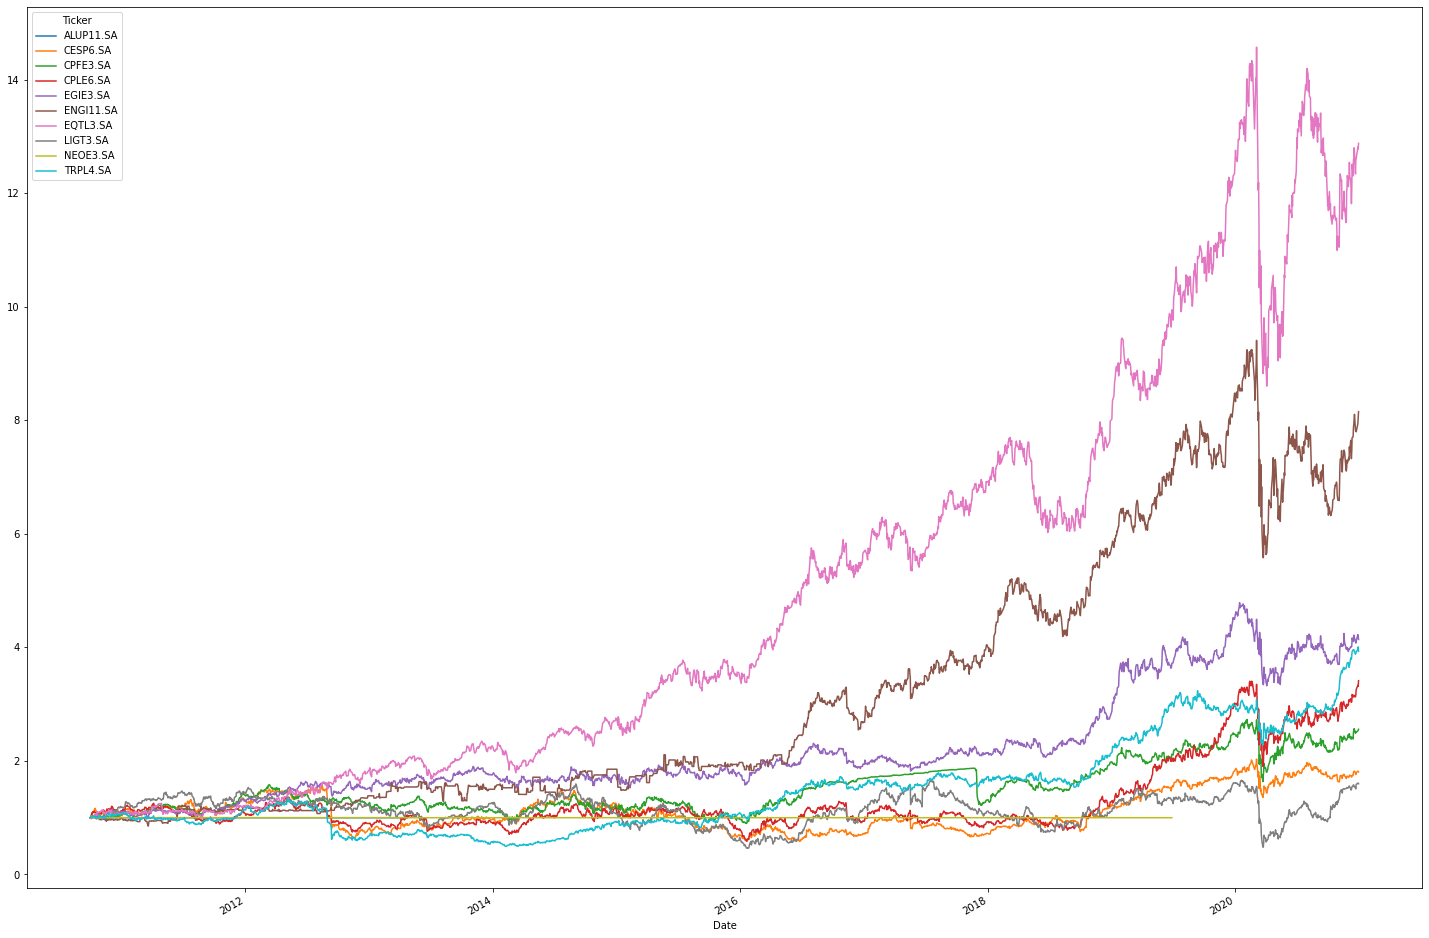

In [47]:
cum_daily_return.plot(figsize=(25,18))
plt.show()

In [48]:
#   média movel #
move_close = daily_close_all.rolling(window=50).mean()

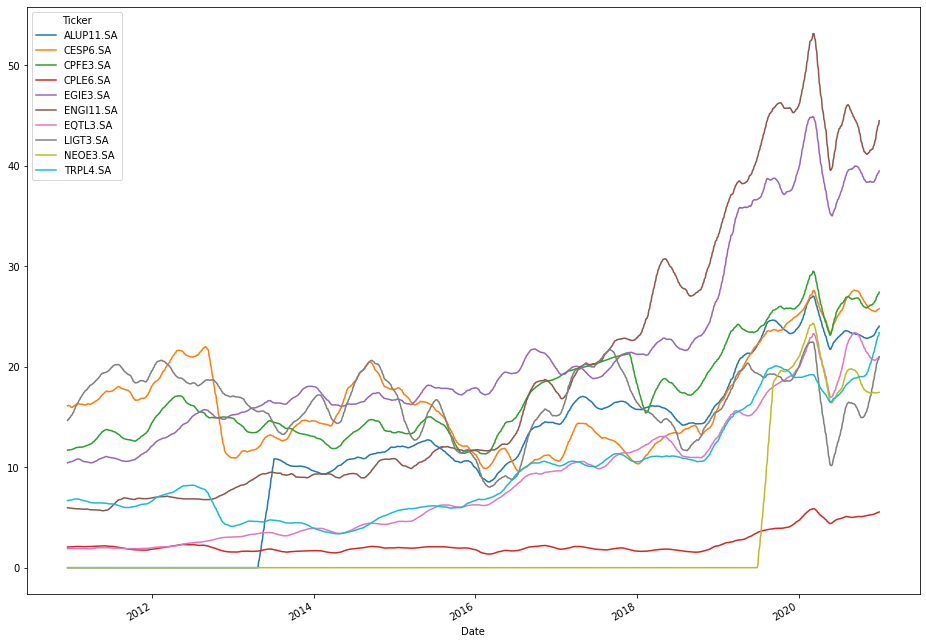

In [49]:
move_close.plot(figsize=(16,12))
plt.show()

In [50]:
# Calculando a volatilidade #
min_periods = 252
vol = daily_pct_chance_all.rolling(min_periods).std() * np.sqrt(min_periods)

In [ ]:
#  Def Calculo da variacao  #
def percet (daily_close_all): # daily_close  #
    daily_pct_chance = (daily_close_all / daily_close_all.shift(1) - 1) # Pega os dias de hoje e divide por os de ontem que nos da a variação # 
    daily_pct_chance.fillna(0,inplace=True) # subtitui os valores de NaN por zero #
    return daily_pct_chance

In [ ]:
#   Def da função volatilidade    #
def vol(daily_pct, period): #percentil por dia # # Periodo #
    volatility = daily_pct.rolling(period).std() * np.sqrt(period) #rola a variação aplicando o periodo ai aplicando std () vezes a raiz do periodo#
    volatility.fillna(0,inplace=True)
    return volatility

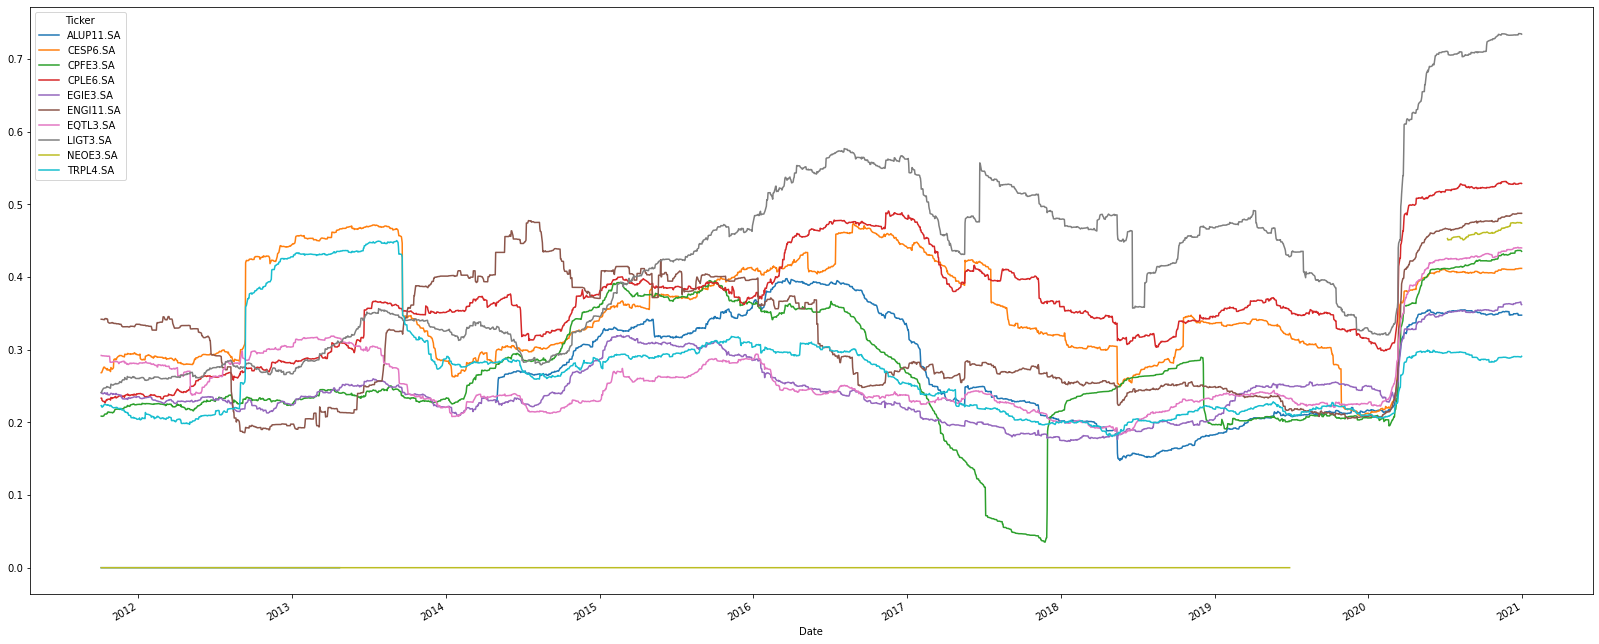

In [51]:
vol.plot(figsize=(28,12),)
plt.show()

In [52]:
vol.dropna()['ALUP11.SA'].describe()

count    1784.000000
mean        0.220298
std         0.132629
min         0.000000
25%         0.157370
50%         0.236184
75%         0.339287
max         0.397699
Name: ALUP11.SA, dtype: float64

In [53]:
len(vol['ALUP11.SA'][vol['ALUP11.SA'] > 0.33])

549

In [54]:
vol.dropna()['ALUP11.SA'].median()

0.23618351539090374

In [55]:
len(vol)

2539

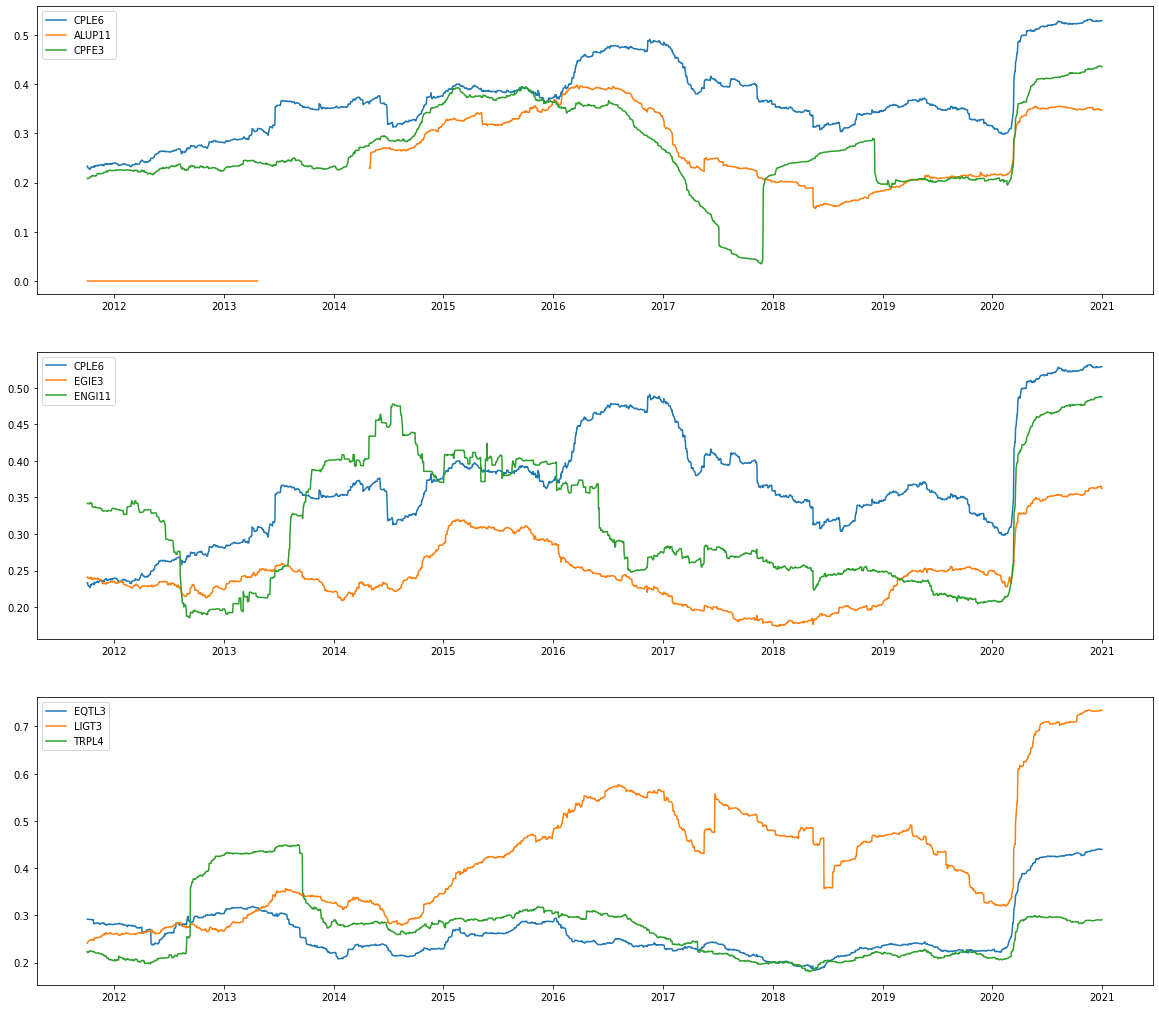

In [56]:
fig, ax = plt.subplots(3, figsize = (20, 18))
ax[0].plot(vol.index, vol['CPLE6.SA'], label='CPLE6')
ax[0].plot(vol.index, vol['ALUP11.SA'], label='ALUP11')
ax[0].plot(vol.index, vol['CPFE3.SA'], label='CPFE3')
ax[0].legend()

ax[1].plot(vol.index, vol['CPLE6.SA'], label='CPLE6')
ax[1].plot(vol.index, vol['EGIE3.SA'], label='EGIE3')
ax[1].plot(vol.index, vol['ENGI11.SA'], label='ENGI11')
ax[1].legend()

ax[2].plot(vol.index, vol['EQTL3.SA'], label='EQTL3')
ax[2].plot(vol.index, vol['LIGT3.SA'], label='LIGT3')
ax[2].plot(vol.index, vol['TRPL4.SA'], label='TRPL4')
ax[2].legend()

In [57]:
all_data.head()

High       Low      Open     Close   Volume  \
Ticker    Date                                                          
ENGI11.SA 2010-10-01  9.135193  9.090192  9.090192  9.135193   9999.0   
          2010-10-04  9.153194  9.090192  9.135193  9.108193  28888.0   
          2010-10-05  9.270196  9.180194  9.180194  9.270196  14666.0   
          2010-10-06  9.315197  9.315197  9.315197  9.315197   5555.0   
          2010-10-07  9.405199  9.225195  9.315197  9.270196  39999.0   

                      Adj Close  
Ticker    Date                   
ENGI11.SA 2010-10-01   6.078484  
          2010-10-04   6.060520  
          2010-10-05   6.168314  
          2010-10-06   6.198258  
          2010-10-07   6.168314

In [58]:
test = all_data.reset_index()[all_data.reset_index().Ticker == 'ENGI11.SA']

In [59]:
test['mean_HL'] = (test.High + test.Low) / 2
test['mean_OC'] = (test.Open + test.Close) / 2

In [60]:
print("HL = {}\nOC = {}".format(test.mean_HL.mean(), test.mean_OC.mean()))

HL = 21.79538953938133
OC = 21.816722913256026


In [61]:
vale = pdr.get_data_yahoo('VALE3.SA', datetime.datetime(2010,10,1), datetime.datetime(2021,1,1))

In [62]:
vale.reset_index(inplace = True)

In [63]:
vale['mean_HL'] = (vale.High + vale.Low) / 2
vale['mean_OC'] = (vale.Open + vale.Close) / 2

In [64]:
print("HL = {}\nOC = {}".format(vale.mean_HL.mean(), vale.mean_OC.mean()))

HL = 38.011287897109234
OC = 38.01334579106437


In [78]:
test.head()

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close,mean_HL,mean_OC
0,ENGI11.SA,2010-10-01,9.135193,9.090192,9.090192,9.135193,9999.0,6.078484,9.112692,9.112692
1,ENGI11.SA,2010-10-04,9.153194,9.090192,9.135193,9.108193,28888.0,6.060520,9.121693,9.121693
2,ENGI11.SA,2010-10-05,9.270196,9.180194,9.180194,9.270196,14666.0,6.168314,9.225195,9.225195
3,ENGI11.SA,2010-10-06,9.315197,9.315197,9.315197,9.315197,5555.0,6.198258,9.315197,9.315197
4,ENGI11.SA,2010-10-07,9.405199,9.225195,9.315197,9.270196,39999.0,6.168314,9.315197,9.292696


## Calculo da Percentil.
Que pega o o fechamento do dia de hoje e divide pelo de ontem.

In [88]:
def percet (daily_close): # daily_close  #
    daily_pct_chance = (daily_close / daily_close.shift(1) - 1)
    daily_pct_chance.fillna(0,inplace=True) # subtitui os valores de NaN por zero #
    return daily_pct_chance

## Calculo da volatilidade.
Primeiro calcula o pct depois determina o periodo que quer e calcula ela.

In [90]:
def vol(daily_pct, period): #percentil por dia # # Periodo #
    volatility = daily_pct.rolling(period).std() * np.sqrt(period)
    return volatility